In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [46]:
df = pd.read_csv("Hospital_Patient_Admissions.csv", parse_dates=["Admit_Date", "Discharge_Date"])

In [47]:
df.head()

,Patient_ID,Name,Age,Gender,Department,Doctor,Admit_Date,Discharge_Date,Diagnosis,Treatment
0,P001,Priya Patel,66,F,Cardiology,Dr. Nair,2025-05-30,2025-06-10,Cancer,Physiotherapy
1,P002,Priya Patel,59,F,Dermatology,Dr. Ghosh,2025-01-08,2025-01-11,Cancer,Stone Removal
2,P003,Neha Gupta,58,M,Neurology,Dr. Nair,2025-06-23,2025-07-08,Cancer,Normal Delivery
3,P004,Ramesh Kumar,33,F,Cardiology,Dr. Banerjee,2025-08-19,2025-09-03,Ear Infection,Medication
4,P005,Vinod Chavan,46,F,Neurology,Dr. Ghosh,2025-01-27,2025-02-06,Fracture,Angioplasty


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Patient_ID      200 non-null    object        
 1   Name            200 non-null    object        
 2   Age             200 non-null    int64         
 3   Gender          200 non-null    object        
 4   Department      200 non-null    object        
 5   Doctor          200 non-null    object        
 6   Admit_Date      200 non-null    datetime64[ns]
 7   Discharge_Date  200 non-null    datetime64[ns]
 8   Diagnosis       200 non-null    object        
 9   Treatment       200 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 15.8+ KB


In [49]:
df.describe(include="all")

,Patient_ID,Name,Age,Gender,Department,Doctor,Admit_Date,Discharge_Date,Diagnosis,Treatment
count,200,200,200.000000,200,200,200,200,200,200,200
unique,200,20,NaN,2,10,10,NaN,NaN,10,10
top,P001,Kavita Joshi,NaN,M,Oncology,Dr. Nair,NaN,NaN,Fracture,Normal Delivery
freq,1,15,NaN,110,26,27,NaN,NaN,27,29
mean,NaN,NaN,47.185000,NaN,NaN,NaN,2025-05-10 05:31:12,2025-05-18 15:36:00,NaN,NaN
min,NaN,NaN,18.000000,NaN,NaN,NaN,2025-01-01 00:00:00,2025-01-03 00:00:00,NaN,NaN
25%,NaN,NaN,30.750000,NaN,NaN,NaN,2025-03-05 18:00:00,2025-03-17 12:00:00,NaN,NaN
50%,NaN,NaN,47.000000,NaN,NaN,NaN,2025-05-10 12:00:00,2025-05-20 00:00:00,NaN,NaN
75%,NaN,NaN,63.000000,NaN,NaN,NaN,2025-07-13 06:00:00,2025-07-21 12:00:00,NaN,NaN
max,NaN,NaN,80.000000,NaN,NaN,NaN,2025-09-18 00:00:00,2025-10-01 00:00:00,NaN,NaN


In [50]:
df.isna().sum()

Patient_ID        0
Name              0
Age               0
Gender            0
Department        0
Doctor            0
Admit_Date        0
Discharge_Date    0
Diagnosis         0
Treatment         0
dtype: int64

In [51]:
df = df.dropna(subset=["Patient_ID", "Admit_Date", "Discharge_Date"])

In [52]:
for col in ["Name", "Gender", "Department", "Doctor", "Diagnosis", "Treatment"]:
    df[col] = df[col].fillna("Unknown")

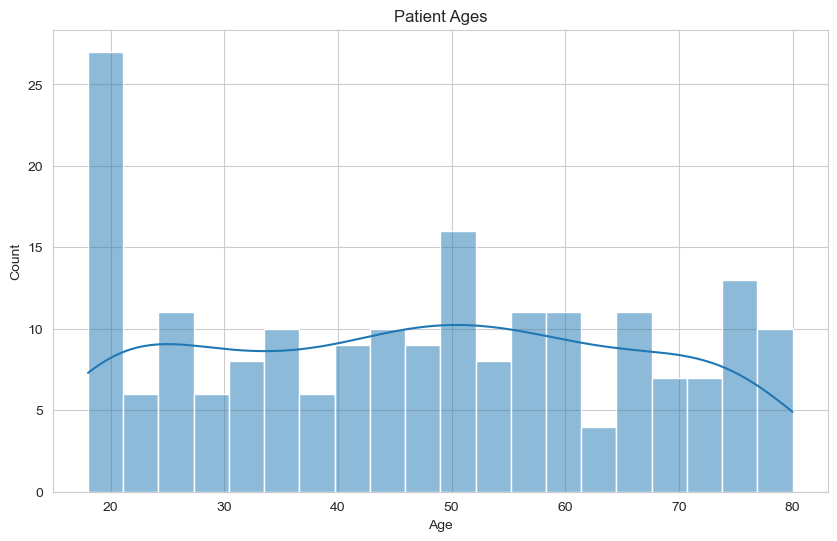

In [53]:
# Age distribution
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Patient Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

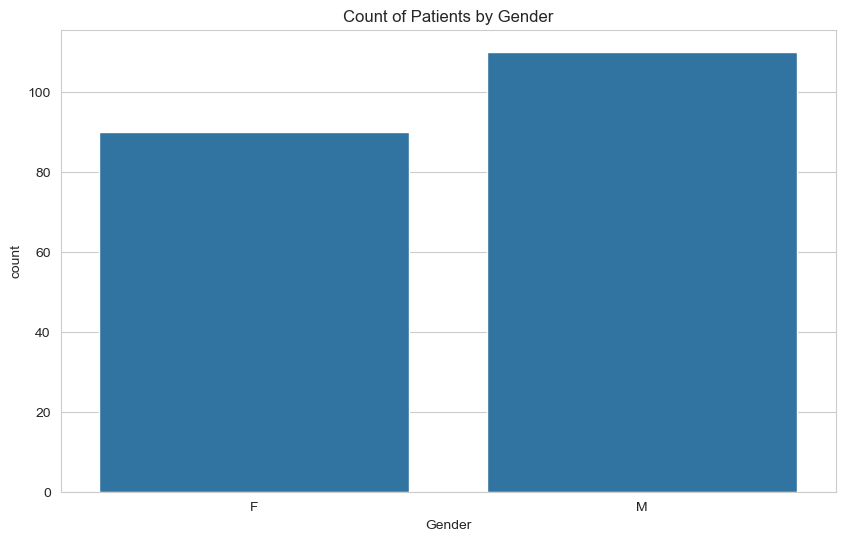

In [54]:
# Gender counts
sns.countplot(x="Gender", data=df)
plt.title("Count of Patients by Gender")
plt.show()

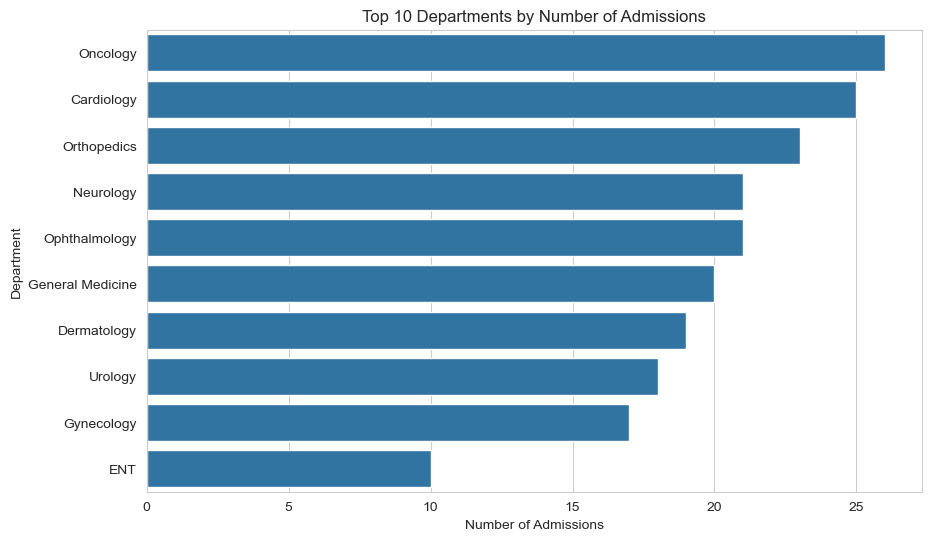

In [55]:
# Convert to DataFrame for barplot (no hue, just colors per bar)
dept_df = dept_counts.reset_index()
dept_df.columns = ["Department", "Count"]

sns.barplot(data=dept_df, y="Department", x="Count", legend=False)
plt.title("Top 10 Departments by Number of Admissions")
plt.xlabel("Number of Admissions")
plt.ylabel("Department")
plt.show()


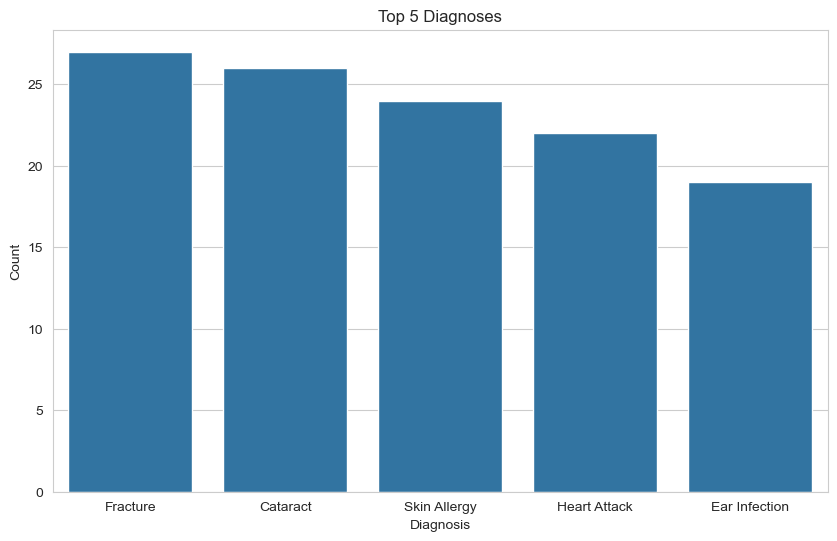

In [56]:
diag_counts = df["Diagnosis"].value_counts().nlargest(5)
sns.barplot(y=diag_counts.values, x=diag_counts.index)
plt.title("Top 5 Diagnoses")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

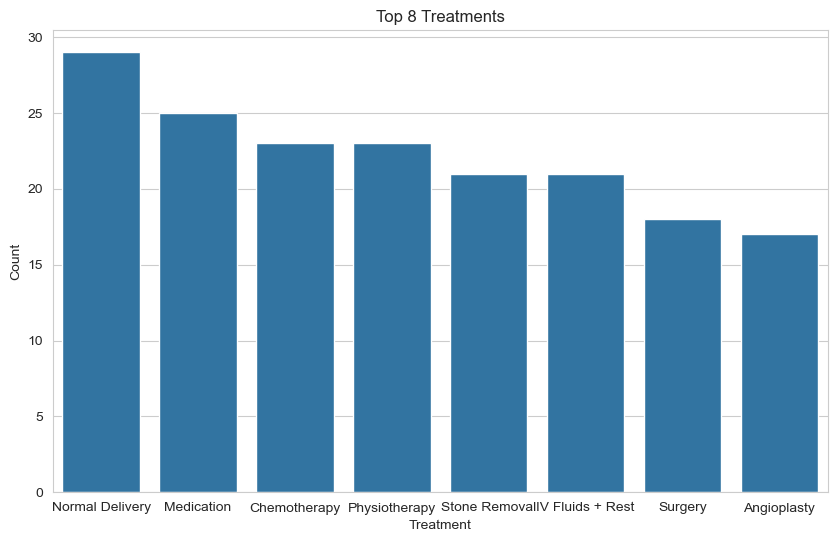

In [57]:
treat_counts = df["Treatment"].value_counts().nlargest(8)
sns.barplot(y=treat_counts.values, x=treat_counts.index)
plt.title("Top 8 Treatments")
plt.xlabel("Treatment")
plt.ylabel("Count")
plt.show()